In [19]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# read the csv file 
Data=pd.read_csv(r"C:\Users\nashi\OneDrive\Documents\mail downloads\house rent.csv")

# Exploratory Data Analysis

In [21]:
Data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [22]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [23]:
# let's drop unnecessory featurs
Data = Data.drop('statezip',axis=1)
Data = Data.drop('country',axis=1)
Data = Data.drop('street',axis=1)
Data = Data.drop('date',axis=1)

In [24]:
# check if there are any Null values
Data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
dtype: int64

C:\Users\nashi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


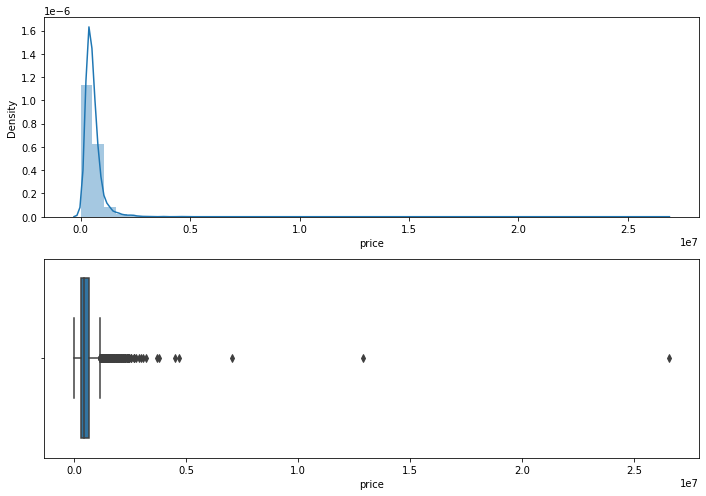

In [25]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()


C:\Users\nashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nashi\AppData\Local\Te

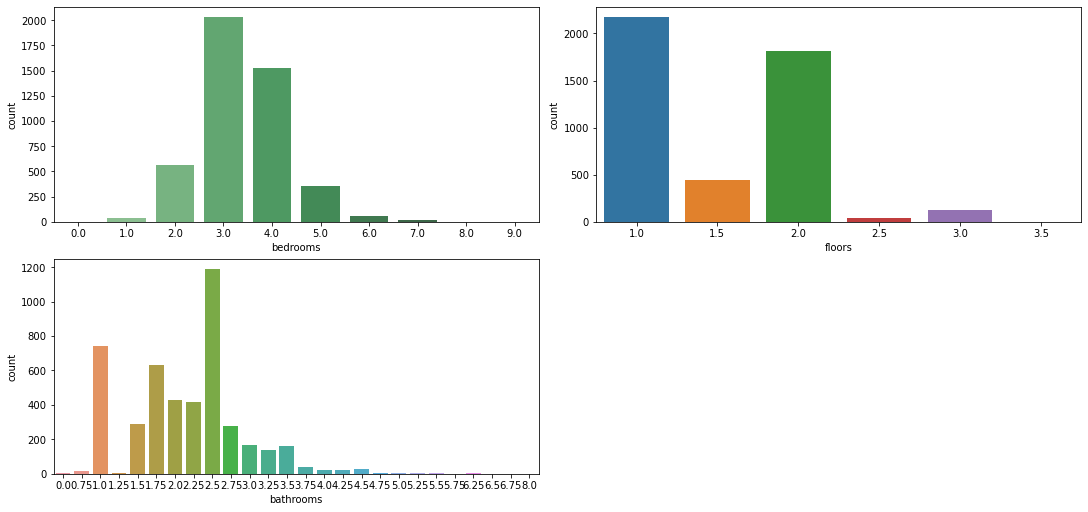

In [26]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.show()

C:\Users\nashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nashi\anacond

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

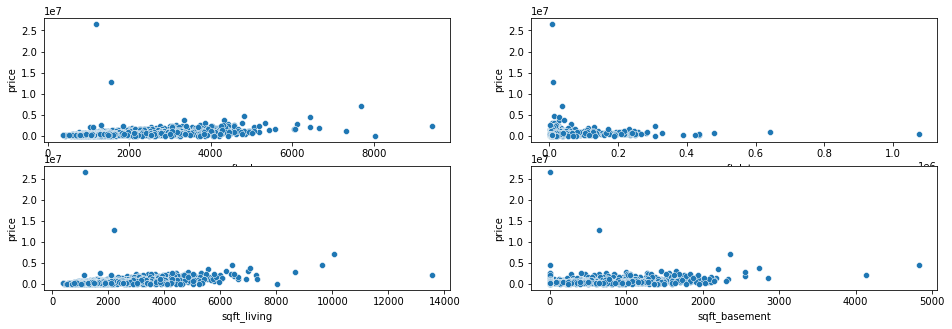

In [27]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

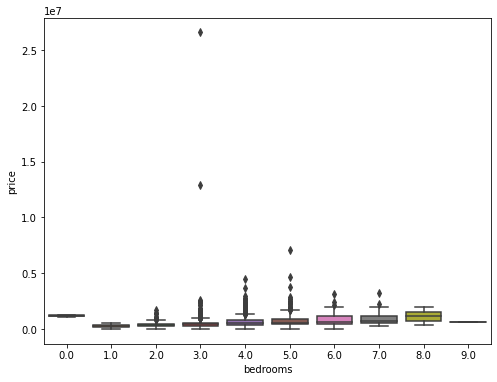

In [28]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (8,6))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

In [29]:
#converting the datatypes of the columns where needed
Data["price"] = Data["price"].astype("int64")
Data["bedrooms"] = Data["bedrooms"].astype("int64")
Data["bathrooms"] = Data["bathrooms"].astype("int64")
Data["floors"] = Data["floors"].astype("int64")
Data["city"] = Data["city"].astype("string")


# Scaling and Train Test Split

In [30]:
Data["city"].unique()

<StringArray>
[          'Shoreline',             'Seattle',                'Kent',
            'Bellevue',             'Redmond',        'Maple Valley',
          'North Bend',    'Lake Forest Park',           'Sammamish',
              'Auburn',          'Des Moines',             'Bothell',
         'Federal Way',            'Kirkland',            'Issaquah',
         'Woodinville',       'Normandy Park',           'Fall City',
              'Renton',           'Carnation',          'Snoqualmie',
              'Duvall',              'Burien',           'Covington',
 'Inglewood-Finn Hill',             'Kenmore',           'Newcastle',
       'Mercer Island',       'Black Diamond',          'Ravensdale',
          'Clyde Hill',              'Algona',           'Skykomish',
             'Tukwila',              'Vashon',        'Yarrow Point',
              'SeaTac',              'Medina',            'Enumclaw',
     'Snoqualmie Pass',             'Pacific',  'Beaux Arts Village',
      

In [31]:
##importing onehotencoder library
from sklearn.preprocessing import OneHotEncoder 
##setting it into a variable 
enc=OneHotEncoder()

In [32]:
enc_data=pd.DataFrame(enc.fit_transform(Data[["city"]]).toarray())

In [33]:
Data=Data.join(enc_data)

In [34]:
Data = Data.drop('city',axis=1)

In [35]:
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,34,35,36,37,38,39,40,41,42,43
0,313000,3,1,1340,7912,1,0,0,3,1340,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000,5,2,3650,9050,2,0,4,5,3370,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000,3,2,1930,11947,1,0,0,4,1930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000,3,2,2000,8030,1,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000,4,2,1940,10500,1,0,0,4,1140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Applying Label encoding on independent variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Data['bedrooms'] = label_encoder.fit_transform(Data['bedrooms'])
Data['bathrooms'] = label_encoder.fit_transform(Data['bathrooms'])
Data['price'] = label_encoder.fit_transform(Data['price'])
Data['sqft_living'] = label_encoder.fit_transform(Data['sqft_living'])
Data['sqft_lot'] = label_encoder.fit_transform(Data['sqft_lot'])
Data['sqft_above'] = label_encoder.fit_transform(Data['sqft_above'])
Data['sqft_basement'] = label_encoder.fit_transform(Data['sqft_basement'])
Data['yr_built'] = label_encoder.fit_transform(Data['yr_built'])
Data['yr_renovated'] = label_encoder.fit_transform(Data['yr_renovated'])

In [37]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Feature Scalling

In [38]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

C:\Users\nashi\AppData\Local\Temp\ipykernel_6212\797503184.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train = s_scaler.fit_transform(X_train.astype(np.float))
C:\Users\nashi\AppData\Local\Temp\ipykernel_6212\797503184.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test = s_scaler.transform(X_test.astype(np.float))


# Linear Regression

In [39]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-1.88204103e+01, -6.44649155e+00,  4.97562793e+02, -2.04519444e+01,
        3.22151837e+01,  1.05813059e+01,  4.05164428e+01,  3.70029832e+01,
       -1.78478678e+02, -1.37199726e+02, -4.04158811e+01, -2.49280312e-01,
       -8.90541880e+11, -5.43504875e+12, -5.14321554e+11, -6.88540682e+12,
       -1.02814219e+12, -2.40414651e+12, -3.64306510e+12, -2.05227211e+12,
       -1.54096016e+12, -2.84964544e+12, -2.84964544e+12, -2.70958268e+12,
       -2.23531728e+12, -1.62405032e+12, -4.96100191e+12, -5.14321554e+11,
       -5.52423349e+12, -3.23220187e+12, -5.65491867e+12, -5.78211666e+12,
       -2.61187402e+12, -4.04101728e+12, -1.35944129e+12, -3.94558798e+12,
       -7.27242468e+11, -2.34925515e+12, -1.77847878e+12, -2.61187402e+12,
       -1.14931117e+12, -7.27242468e+11, -1.14931117e+12, -6.31686864e+12,
       -6.93566863e+12, -5.47985390e+12, -2.34925515e+12, -1.35562286e+13,
       -4.72984508e+12, -8.90541880e+11, -3.42544918e+12, -5.14321554e+11,
       -2.45777732e+12, -

In [40]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,1624,1926.403584
1,460,521.509053
2,491,464.694600
3,1181,1336.555928
4,395,222.302022
5,8,114.415303
6,1146,1138.813741
7,399,617.544209
8,277,432.387959
9,827,899.708272


C:\Users\nashi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

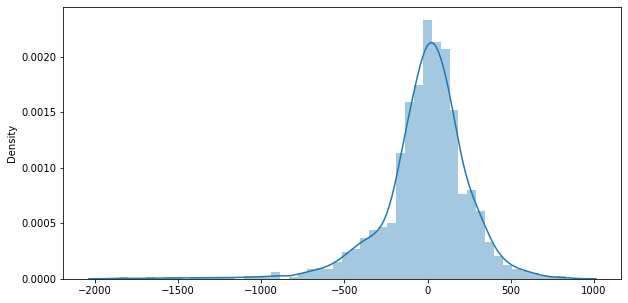

In [41]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [42]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 179.64
Mean Squared Error:68925.87
Root Mean Squared Error:262.54
Variance score is: 0.67


In [43]:
# we are off about 20% (comparing mean absolut error and mean of price)
Data['price'].mean()

813.9219565217392

In [54]:
print('Linear Regression Model:')
linear_train_score=print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
linear_test_score=print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.70
Test Score 0.67


In [47]:
# 2. Creating a Random Forest Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred2 = RF.predict(X_test)

# 3. Creating a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred3 = GB.predict(X_test)

# 4. Creating a SVR Model
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)
y_pred4 = svm.predict(X_test)

# 5. Creating a Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred5 = DT.predict(X_test)

# 6. Creating Ridge Model
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred6 = ridge.predict(X_test)



In [49]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score2 = r2_score(y_test, y_pred2)
r2_score3 = r2_score(y_test, y_pred3)
r2_score4 = r2_score(y_test, y_pred4)
r2_score5 = r2_score(y_test, y_pred5)
r2_score6 = r2_score(y_test, y_pred6)

mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)
mse6 = mean_squared_error(y_test, y_pred6)

rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)
rmse6 = np.sqrt(mse6)

print("Random Forest R2 Score :", r2_score2)
print("Random Forest MSE :", mse2)
print("Random Forest RMSE :", rmse2)
print()
print("Gradient Boosting R2 Score :", r2_score3)
print("Gradient Boosting MSE :", mse3)
print("Gradient Boosting RMSE :", rmse3)
print()
print("SVR R2 Score :", r2_score4)
print("SVR MSE :", mse4)
print("SVR RMSE :", rmse4)
print()
print("Decision Tree R2 Score :", r2_score5)
print("Decision Tree MSE :", mse5)
print("Decision Tree RMSE :", rmse5)
print()
print("Ridge R2 Score :", r2_score6)
print("Ridge MSE :", mse6)
print("Ridge RMSE :", rmse6)

Random Forest R2 Score : 0.6398017400266999
Random Forest MSE : 74391.31363434343
Random Forest RMSE : 272.7477105941376

Gradient Boosting R2 Score : 0.6578173221422097
Gradient Boosting MSE : 70670.57711673922
Gradient Boosting RMSE : 265.8393821779219

SVR R2 Score : 0.16134054859803026
SVR MSE : 173207.32833710787
SVR RMSE : 416.18184527572544

Decision Tree R2 Score : 0.33934324343628686
Decision Tree MSE : 136444.64575098813
Decision Tree RMSE : 369.38414388139097

Ridge R2 Score : 0.6663342001894663
Ridge MSE : 68911.59653186383
Ridge RMSE : 262.5101836726793


In [51]:
# Performing cross validaion
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, X, y, cv=5)
print(scores)
print("Mean of all scores: ",scores.mean())


[0.74364854 0.72018514 0.75236549 0.75529938 0.399937  ]
Mean of all scores:  0.674287110088023


In [55]:
# Creating dataframe for Models with scores
score = pd.DataFrame({'Models':['Linear Regression', 'Random Forest Regressor', 
                'Gradient Boosting Regressor', 'SVR', 'DecisionTreeRegressor', 
                                     'Ridge'], 
                        'R2_Score': [linear_test_score, r2_score2, r2_score3, r2_score4, r2_score5,
                                     r2_score6]})

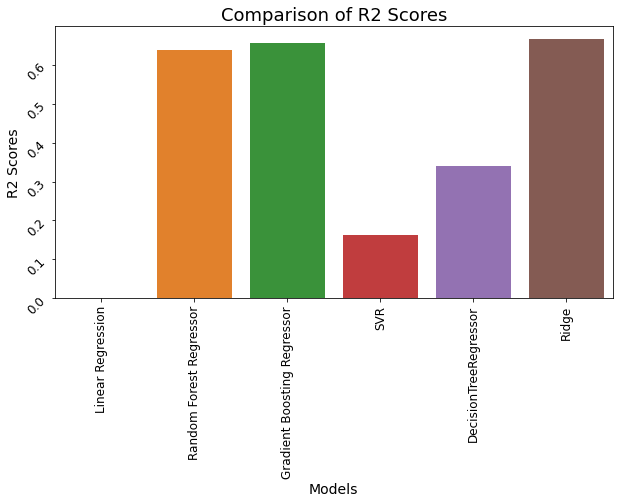

In [57]:

# Visualize the scores on barplot
plt.figure(figsize = (10, 5))
sns.barplot(x = score['Models'],y =score['R2_Score'])

# Set the axis labels and title
plt.xlabel('Models', fontsize= 14)
plt.ylabel('R2 Scores', fontsize= 14)
plt.xticks(fontsize= 10, rotation = 90)
plt.yticks(fontsize= 10, rotation = 45)
plt.title('Comparison of R2 Scores', fontsize = 15)
plt.show()


# How we can use the model!

In [58]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = Data.drop('price',axis = 1).iloc[0]

In [59]:

# need to apply feature scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,56))

In [60]:
# apply model on those features
regressor.predict(single_house)

array([414.38405319])

In [64]:
import pickle 
pickle.dump(RF,open("model_rf.pkl", 'wb'))